In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [8]:
# Load the Excel file
gtd_data = pd.read_excel('/content/globalterrorismdb_0522dist.xlsx')

In [9]:
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [10]:
print(f"Dataset shape: {gtd_data.shape}")

Dataset shape: (209706, 135)


In [11]:
print(f"Columns: {len(gtd_data.columns)}")

Columns: 135


# Basic info about the dataset

In [ ]:
print("=== DATASET OVERVIEW ===")

=== DATASET OVERVIEW ===


In [ ]:
print(f"Total records: {len(gtd_data):,}")

Total records: 209,706


In [ ]:
print(f"Date range: {gtd_data['iyear'].min()} - {gtd_data['iyear'].max()}")

Date range: 1970 - 2020


In [ ]:
print(f"Countries covered: {gtd_data['country_txt'].nunique()}")

Countries covered: 204


In [ ]:
gtd_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN



# Check Nigeria-specific info


In [12]:
nigeria_data = gtd_data[gtd_data['country_txt'] == 'Nigeria'].copy()

In [ ]:
print(f"\n=== NIGERIA SPECIFIC ===")


=== NIGERIA SPECIFIC ===


In [ ]:
print(f"Nigeria attacks: {len(nigeria_data):,}")

Nigeria attacks: 5,550


In [ ]:
print(f"Nigeria date range: {nigeria_data['iyear'].min()} - {nigeria_data['iyear'].max()}")

Nigeria date range: 1976 - 2020


In [ ]:
# Create Nigeria-only dataset
nigeria_data = gtd_data[gtd_data['country_txt'] == 'Nigeria'].copy()

In [ ]:
print(f"Nigeria dataset created: {len(nigeria_data)} attacks")

Nigeria dataset created: 5550 attacks


""Clean and prepare Nigeria terrorism data"""

In [ ]:
# 1. Handle missing values for critical columns
nigeria_data['provstate'] = nigeria_data['provstate'].fillna('Unknown')

In [ ]:
nigeria_data['gname'] = nigeria_data['gname'].fillna('Unknown')

In [ ]:
# Create proper date column
nigeria_data['date'] = pd.to_datetime(
    nigeria_data['iyear'].astype(str) + '-' +
    nigeria_data['imonth'].astype(str) + '-' +
    nigeria_data['iday'].astype(str),
    errors='coerce')

In [ ]:
print("\nRemaining missing values in nigeria_data:")
display(nigeria_data.isnull().sum()[nigeria_data.isnull().sum() > 0].sort_values(ascending=False))


Remaining missing values in nigeria_data:


,0
guncertain3,5550
gname3,5550
gsubname3,5550
weapsubtype4,5550
weapsubtype4_txt,5550
...,...
latitude,47
longitude,47
natlty1,10
natlty1_txt,10


In [ ]:
# Identify columns with all (or nearly all) missing values in nigeria_data
missing_counts = nigeria_data.isnull().sum()
all_missing_columns = missing_counts[missing_counts == len(nigeria_data)].index.tolist()

if all_missing_columns:
    print(f"Columns with all {len(nigeria_data)} missing values (will be dropped):\n{all_missing_columns}")
    nigeria_data.drop(columns=all_missing_columns, inplace=True)
    print("These columns have been dropped.")
else:
    print("No columns found with all missing values.")

# Display remaining columns with significant missing values (if any, after dropping 'all missing')
print("\nRemaining missing values after dropping entirely empty columns:")
display(nigeria_data.isnull().sum()[nigeria_data.isnull().sum() > 0].sort_values(ascending=False))

Columns with all 5550 missing values (will be dropped):
['gname3', 'gsubname3', 'guncertain3', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt']
These columns have been dropped.

Remaining missing values after dropping entirely empty columns:


,0
claimmode3,5549
claimmode3_txt,5549
gsubname2,5549
claim3,5549
claimmode2,5546
...,...
nwoundus,67
nkillus,64
summary,60
claimed,60


In [ ]:
# Verify that these specific columns no longer have missing values
print("\nRemaining missing values in specified columns after filling:")
print(nigeria_data[['latitude', 'longitude', 'natlty1', 'natlty1_txt', 'target1']].isnull().sum())


Remaining missing values in specified columns after filling:
latitude       0
longitude      0
natlty1        0
natlty1_txt    0
target1        0
dtype: int64


Handle casualty data



In [ ]:
nigeria_data['nkill'] = nigeria_data['nkill'].fillna(0)

In [ ]:
nigeria_data['nwound'] = nigeria_data['nwound'].fillna(0)

In [ ]:
nigeria_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5550 entries, 3593 to 209664
Columns: 129 entries, eventid to date
dtypes: datetime64[ns](2), float64(50), int64(23), object(54)
memory usage: 5.5+ MB


In [ ]:
nigeria_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
3593,197602130003,1976,2,13,NaN,0,NaT,147,Nigeria,11,...,"Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9,NaN,1976-02-13
10025,198001170007,1980,1,17,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,PGIS,1,1,1,1,NaN,1980-01-17
20219,198311110001,1983,11,11,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,1983-11-11
20347,198311270001,1983,11,27,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,1983-11-27
20359,198311290002,1983,11,29,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,1983-11-29


In [ ]:
nigeria_data['total_casualties'] = nigeria_data['nkill'] + nigeria_data['nwound']

In [ ]:
 nigeria_data['gname_clean'] = nigeria_data['gname'].replace('Unknown', np.nan)

In [ ]:
nigeria_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5550 entries, 3593 to 209664
Columns: 131 entries, eventid to gname_clean
dtypes: datetime64[ns](2), float64(51), int64(23), object(55)
memory usage: 5.6+ MB


In [ ]:
nigeria_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date,total_casualties,gname_clean
3593,197602130003,1976,2,13,NaN,0,NaT,147,Nigeria,11,...,NaN,UMD Miscellaneous,-9,-9,0,-9,NaN,1976-02-13,4.0,Coup plotters
10025,198001170007,1980,1,17,NaN,0,NaT,147,Nigeria,11,...,NaN,PGIS,1,1,1,1,NaN,1980-01-17,0.0,Zimbabwe Patriotic Front
20219,198311110001,1983,11,11,NaN,0,NaT,147,Nigeria,11,...,NaN,PGIS,-9,-9,0,-9,NaN,1983-11-11,1.0,NaN
20347,198311270001,1983,11,27,NaN,0,NaT,147,Nigeria,11,...,NaN,PGIS,-9,-9,0,-9,NaN,1983-11-27,1.0,Gang
20359,198311290002,1983,11,29,NaN,0,NaT,147,Nigeria,11,...,NaN,PGIS,-9,-9,0,-9,NaN,1983-11-29,1.0,NaN


In [13]:
nigeria_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
3593,197602130003,1976,2,13,NaN,0,NaT,147,Nigeria,11,...,"The victims included Sergeant Adamu Michika, S...","Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9,NaN
10025,198001170007,1980,1,17,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
20219,198311110001,1983,11,11,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
20347,198311270001,1983,11,27,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
20359,198311290002,1983,11,29,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN


In [15]:
 nigeria_data['gname_clean'] = nigeria_data['gname'].replace('Unknown', np.nan)


In [73]:
print("Data cleaning completed!")

Data cleaning completed!


### Imputing Categorical Columns with 'Unknown'

In [21]:
# List of categorical columns to fill with 'Unknown'
categorical_cols_to_fill = [
    'summary',
    'target_type_txt',
    'natlty2_txt',
    'natlty1_txt',
    'gname_clean'
]

for col in categorical_cols_to_fill:
    if col in nigeria_data.columns:
        nigeria_data[col] = nigeria_data[col].fillna('Unknown')
        print(f"Filled missing values in '{col}' with 'Unknown'.")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Display remaining missing values to confirm changes
print("\nRemaining missing values after filling categorical columns:")
missing_values_summary_after_categorical_fill = nigeria_data.isnull().sum()
display(missing_values_summary_after_categorical_fill[missing_values_summary_after_categorical_fill > 0].sort_values(ascending=False))

Filled missing values in 'summary' with 'Unknown'.
Column 'target_type_txt' not found in the DataFrame.
Filled missing values in 'natlty2_txt' with 'Unknown'.
Filled missing values in 'natlty1_txt' with 'Unknown'.
Filled missing values in 'gname_clean' with 'Unknown'.

Remaining missing values after filling categorical columns:


,0
ransomnote,5488
compclaim,5469
targsubtype3_txt,5462
targsubtype3,5462
corp3,5462
...,...
scite1,60
longitude,47
latitude,47
natlty1,10


### Dropping Columns with Over 99% Missing Values

In [20]:
# Identify columns with more than 99% missing values
threshold = 0.99
missing_percentage = nigeria_data.isnull().sum() / len(nigeria_data)
columns_to_drop_high_missing = missing_percentage[missing_percentage > threshold].index.tolist()

if columns_to_drop_high_missing:
    print(f"Dropping the following columns (more than {threshold*100}% missing values):\n{columns_to_drop_high_missing}")
    nigeria_data.drop(columns=columns_to_drop_high_missing, inplace=True)
    print("Columns dropped successfully.")
else:
    print("No columns found with more than 99% missing values.")

# Display remaining missing values to confirm
print("\nRemaining missing values after dropping high-missing columns:")
missing_values_summary_after_second_drop = nigeria_data.isnull().sum()
display(missing_values_summary_after_second_drop[missing_values_summary_after_second_drop > 0].sort_values(ascending=False))

Dropping the following columns (more than 99.0% missing values):
['gname2', 'gsubname2', 'guncertain2', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'divert', 'kidhijcountry']
Columns dropped successfully.

Remaining missing values after dropping high-missing columns:


,0
ransomnote,5488
compclaim,5469
targsubtype3,5462
targsubtype3_txt,5462
corp3,5462
...,...
latitude,47
longitude,47
natlty1,10
natlty1_txt,10


### Dropping entirely empty columns

In [19]:
# Identify columns with exactly 5550 missing values (all rows are missing)
columns_to_drop_completely_empty = missing_values_summary[missing_values_summary == 5550].index.tolist()

if columns_to_drop_completely_empty:
    print(f"Dropping the following columns (all values missing):\n{columns_to_drop_completely_empty}")
    nigeria_data.drop(columns=columns_to_drop_completely_empty, inplace=True)
    print("Columns dropped successfully.")
else:
    print("No columns found with 5550 missing values.")

# Display remaining missing values to confirm
print("\nRemaining missing values after dropping completely empty columns:")
missing_values_summary_after_drop = nigeria_data.isnull().sum()
display(missing_values_summary_after_drop[missing_values_summary_after_drop > 0].sort_values(ascending=False))

Dropping the following columns (all values missing):
['gname3', 'gsubname3', 'guncertain3', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt']
Columns dropped successfully.

Remaining missing values after dropping completely empty columns:


,0
gsubname2,5549
claimmode3,5549
claim3,5549
claimmode3_txt,5549
claimmode2_txt,5546
...,...
longitude,47
latitude,47
natlty1,10
natlty1_txt,10


### Current State of Missing Values in `nigeria_data`

In [18]:
print("Remaining missing values in nigeria_data (after cleaning steps):")
missing_values_summary = nigeria_data.isnull().sum()
display(missing_values_summary[missing_values_summary > 0].sort_values(ascending=False))

Remaining missing values in nigeria_data (after cleaning steps):


,0
weaptype4,5550
guncertain3,5550
gsubname3,5550
gname3,5550
weapsubtype4,5550
...,...
latitude,47
longitude,47
natlty1_txt,10
natlty1,10


### Imputing Numerical Columns (e.g., Latitude and Longitude)

In [23]:
# List of numerical columns to fill with their mean
numerical_cols_to_impute = ['latitude', 'longitude', 'natlty1', 'target1', 'nkillus']

for col in numerical_cols_to_impute:
    if col in nigeria_data.columns:
        # Convert the column to numeric, coercing errors to NaN
        nigeria_data[col] = pd.to_numeric(nigeria_data[col], errors='coerce')
        if nigeria_data[col].isnull().any():
            mean_value = nigeria_data[col].mean()
            nigeria_data[col] = nigeria_data[col].fillna(mean_value)
            print(f"Filled missing values in numerical column '{col}' with its mean ({mean_value:.2f}).")
        else:
            print(f"Column '{col}' has no missing values to impute.")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Display remaining missing values to confirm changes
print("\nRemaining missing values after numerical imputation:")
missing_values_after_numerical_imputation = nigeria_data.isnull().sum()
display(missing_values_after_numerical_imputation[missing_values_after_numerical_imputation > 0].sort_values(ascending=False))

Column 'latitude' has no missing values to impute.
Column 'longitude' has no missing values to impute.
Column 'natlty1' has no missing values to impute.
Filled missing values in numerical column 'target1' with its mean (nan).
Filled missing values in numerical column 'nkillus' with its mean (0.00).

Remaining missing values after numerical imputation:


,0
target1,5550
ransomnote,5488
compclaim,5469
corp3,5462
targsubtype3,5462
...,...
targsubtype1_txt,166
nperpcap,104
nwoundus,67
claimed,60


In [28]:
##State with most attacks
state_attacks = nigeria_data['provstate'].value_counts()
top_state = state_attacks.index[0]
top_attacks = state_attacks.iloc[0]

### Dropping `target1` column

In [25]:
if 'target1' in nigeria_data.columns:
    nigeria_data.drop(columns=['target1'], inplace=True)
    print("Column 'target1' dropped successfully.")
else:
    print("Column 'target1' not found in the DataFrame.")

# Display remaining missing values to confirm changes
print("\nRemaining missing values after dropping 'target1':")
missing_values_after_target1_drop = nigeria_data.isnull().sum()
display(missing_values_after_target1_drop[missing_values_after_target1_drop > 0].sort_values(ascending=False))

Column 'target1' dropped successfully.

Remaining missing values after dropping 'target1':


,0
ransomnote,5488
compclaim,5469
targsubtype3_txt,5462
corp3,5462
targsubtype3,5462
...,...
targsubtype1,166
nperpcap,104
nwoundus,67
claimed,60


### Dropping Columns with Over 5000 Missing Values

In [26]:
# Identify columns with more than 5000 missing values
threshold_missing_count = 5000
columns_to_drop_over_5k_missing = missing_values_after_target1_drop[missing_values_after_target1_drop > threshold_missing_count].index.tolist()

if columns_to_drop_over_5k_missing:
    print(f"Dropping the following columns (more than {threshold_missing_count} missing values):\n{columns_to_drop_over_5k_missing}")
    nigeria_data.drop(columns=columns_to_drop_over_5k_missing, inplace=True)
    print("Columns dropped successfully.")
else:
    print("No columns found with more than 5000 missing values.")

# Display remaining missing values to confirm
print("\nRemaining missing values after dropping columns with > 5000 missing:")
missing_values_after_5k_drop = nigeria_data.isnull().sum()
display(missing_values_after_5k_drop[missing_values_after_5k_drop > 0].sort_values(ascending=False))

Dropping the following columns (more than 5000 missing values):
['approxdate', 'resolution', 'attacktype3', 'attacktype3_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'compclaim', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'nhours', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote']
Columns dropped successfully.

Remaining missing values after dropping columns with > 5000 missing:


,0
corp2,4999
targsubtype2_txt,4984
targsubtype2,4984
natlty2,4981
claimmode_txt,4974
claimmode,4974
target2,4973
targtype2_txt,4971
targtype2,4971
ndays,4920


In [29]:
##State with least attacks (excluding 'Unknown')
known_states = state_attacks[state_attacks.index != 'Unknown']
bottom_state = known_states.index[-1] if len(known_states) > 0 else "N/A"
bottom_attacks = known_states.iloc[-1] if len(known_states) > 0 else 0

In [30]:
##Top perpetrator groups
top_groups = nigeria_data[nigeria_data['gname'] != 'Unknown']['gname'].value_counts().head(5)

In [32]:
##Year with most attacks
yearly_attacks = nigeria_data['iyear'].value_counts()
peak_year = yearly_attacks.idxmax()
peak_count = yearly_attacks.max()

In [34]:
##Target analysis (for gender inference)
top_targets = nigeria_data['targtype1_txt'].value_counts().head(3)

In [36]:
##Print results
print(f"1.STATE WITH MOST ATTACKS: {top_state} ({top_attacks:,} attacks)")
print(f"2.STATE WITH LEAST ATTACKS: {bottom_state} ({bottom_attacks} attacks)")

print(f"3.TOP 5 PERPETRATOR GROUPS:")
for i, (group, count) in enumerate(top_groups.items(), 1):
    print(f"   {i}. {group}: {count:,} attacks")

print(f"4.YEAR WITH MOST ATTACKS: {peak_year} ({peak_count:,} attacks)")

print(f"5.MOST FREQUENT TARGETS:")
for i, (target, count) in enumerate(top_targets.items(), 1):
    print(f"   {i}. {target}: {count:,} attacks")


1.STATE WITH MOST ATTACKS: Borno (2,024 attacks)
2.STATE WITH LEAST ATTACKS: Kebbi (2 attacks)
3.TOP 5 PERPETRATOR GROUPS:
   1. Boko Haram: 2,790 attacks
   2. Fulani extremists: 1,075 attacks
   3. Movement for the Emancipation of the Niger Delta (MEND): 85 attacks
   4. Niger Delta Avengers (NDA): 50 attacks
   5. Ijaw extremists: 20 attacks
4.YEAR WITH MOST ATTACKS: 2014 (713 attacks)
5.MOST FREQUENT TARGETS:
   1. Private Citizens & Property: 2,673 attacks
   2. Military: 608 attacks
   3. Government (General): 507 attacks


In [38]:
print("\n" + "="*50)
print("DATA QUALITY CHECK")
print("="*50)

total = len(nigeria_data)


DATA QUALITY CHECK


In [41]:
quality_metrics = {
        'State information': nigeria_data['provstate'].notna().sum(),
        'Perpetrator identified': (nigeria_data['gname'] != 'Unknown').sum(),
        'Casualty data available': nigeria_data['nkill'].notna().sum(),
        'Attack type recorded': nigeria_data['attacktype1_txt'].notna().sum(),
        'Target type recorded': nigeria_data['targtype1_txt'].notna().sum()
    }

In [44]:
for metric, count in quality_metrics.items():
    pct = (count / total) * 100
    print(f"{metric:25}: {count:>5} ({pct:5.1f}%)")

print(f"\nTotal Nigeria attacks in dataset: {total:,}")

State information        :  5550 (100.0%)
Perpetrator identified   :  4199 ( 75.7%)
Casualty data available  :  5059 ( 91.2%)
Attack type recorded     :  5550 (100.0%)
Target type recorded     :  5550 (100.0%)

Total Nigeria attacks in dataset: 5,550


DATA VISUALIZATION

Text(0.5, 0.98, 'Nigeria Terrorism Analysis - Initial Insights')

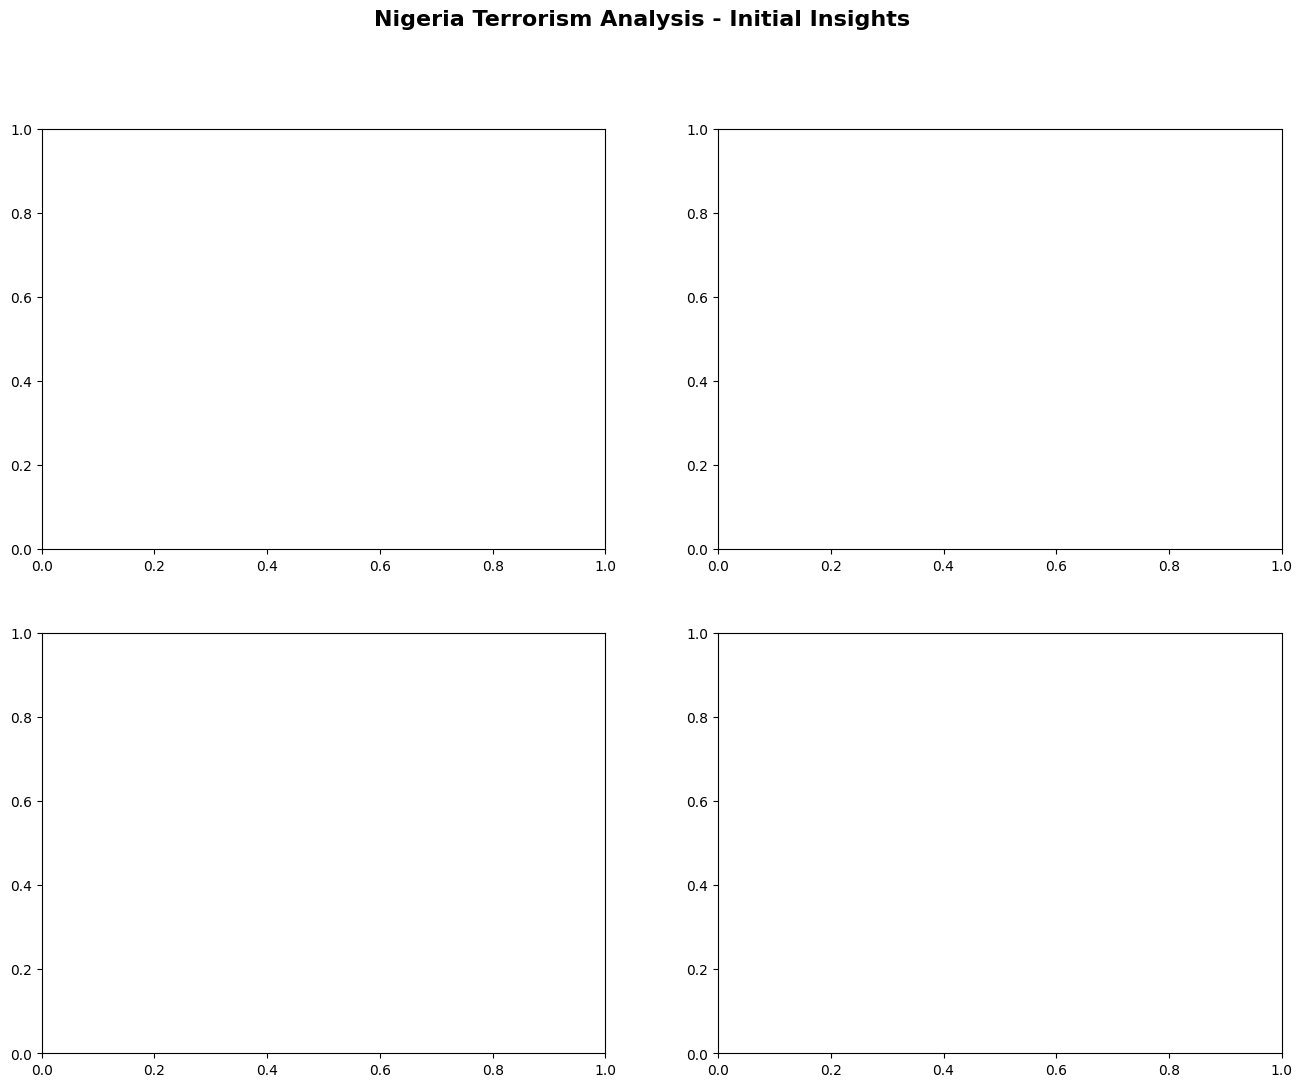

In [46]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Nigeria Terrorism Analysis - Initial Insights', fontsize=16, fontweight='bold')

In [48]:
##Top 10 States
top_states = nigeria_data['provstate'].value_counts().head(10)
axes[0,0].barh(top_states.index, top_states.values, color='crimson')
axes[0,0].set_title('Top 10 States by Number of Attacks')
axes[0,0].set_xlabel('Number of Attacks')

Text(0.5, 508.44444444444457, 'Number of Attacks')

In [50]:
##Yearly Trend
yearly = nigeria_data['iyear'].value_counts().sort_index()
axes[0,1].plot(yearly.index, yearly.values, marker='o', linewidth=2.5, color='darkblue')
axes[0,1].set_title('Terrorist Attacks in Nigeria (1970-2022)')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Number of Attacks')
axes[0,1].grid(True, alpha=0.3)

In [52]:
##Top Perpetrator Groups
top_groups = nigeria_data[nigeria_data['gname'] != 'Unknown']['gname'].value_counts().head(8)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_groups)))
axes[1,0].bar(top_groups.index, top_groups.values, color=colors)
axes[1,0].set_title('Top Perpetrator Groups')
axes[1,0].set_ylabel('Number of Attacks')
axes[1,0].tick_params(axis='x', rotation=45)

In [54]:
attack_types = nigeria_data['attacktype1_txt'].value_counts().head(6)
axes[1,1].pie(attack_types.values, labels=attack_types.index, autopct='%1.1f%%',
                  startangle=90, colors=plt.cm.Pastel1(np.linspace(0, 1, len(attack_types))))
axes[1,1].set_title('Distribution of Attack Types')



<Figure size 640x480 with 0 Axes>

In [55]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

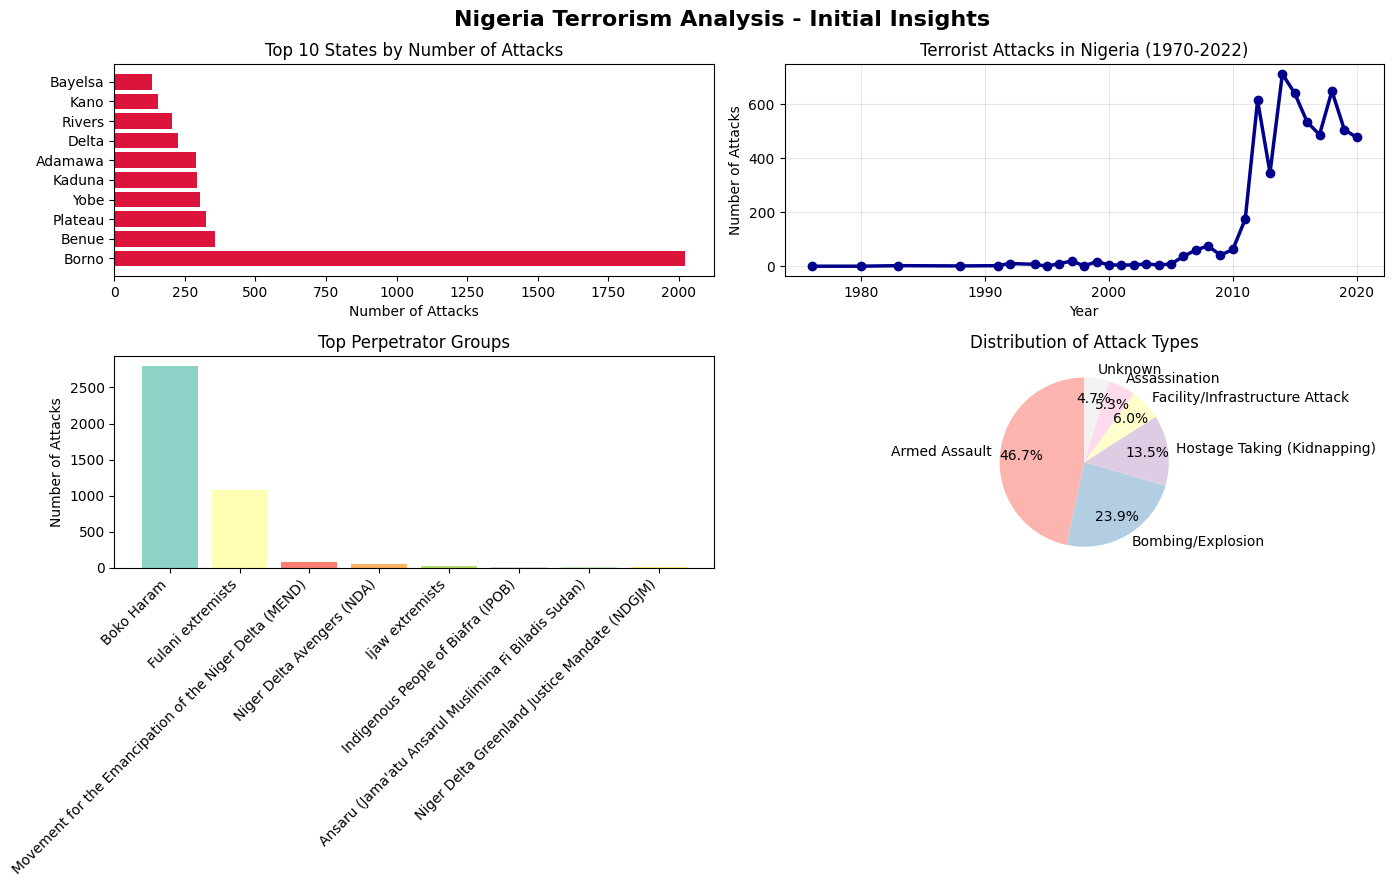

In [72]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Nigeria Terrorism Analysis - Initial Insights', fontsize=16, fontweight='bold')

##Top 10 States
top_states = nigeria_data['provstate'].value_counts().head(10)
axes[0,0].barh(top_states.index, top_states.values, color='crimson')
axes[0,0].set_title('Top 10 States by Number of Attacks')
axes[0,0].set_xlabel('Number of Attacks')

##Yearly Trend
yearly = nigeria_data['iyear'].value_counts().sort_index()
axes[0,1].plot(yearly.index, yearly.values, marker='o', linewidth=2.5, color='darkblue')
axes[0,1].set_title('Terrorist Attacks in Nigeria (1970-2022)')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Number of Attacks')
axes[0,1].grid(True, alpha=0.3)

##Top Perpetrator Groups
top_groups = nigeria_data[nigeria_data['gname'] != 'Unknown']['gname'].value_counts().head(8)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_groups)))
axes[1,0].bar(top_groups.index, top_groups.values, color=colors)
axes[1,0].set_title('Top Perpetrator Groups')
axes[1,0].set_ylabel('Number of Attacks')
axes[1,0].tick_params(axis='x', rotation=45)
for label in axes[1,0].get_xticklabels():
    label.set_horizontalalignment('right')

## Attack Types
attack_types = nigeria_data['attacktype1_txt'].value_counts().head(6)
wedges, texts, autotexts = axes[1,1].pie(attack_types.values, labels=attack_types.index, autopct='%1.1f%%',
                  startangle=90, colors=plt.cm.Pastel1(np.linspace(0, 1, len(attack_types))),
                  pctdistance=0.75, labeldistance=1.1, textprops={'fontsize': 10})

# Adjust font size and color for percentage texts
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black') # Make percentage text black for contrast

# Adjust font size and color for label texts
for text in texts:
    text.set_fontsize(10) # Set a consistent font size for labels
    text.set_color('black') # Make labels black for contrast

axes[1,1].set_title('Distribution of Attack Types')

plt.tight_layout()
plt.show()

In [66]:
##Save the cleaned Nigeria dataset for future analysis
nigeria_data.to_csv('nigeria_terrorism_cleaned.xlsx', index=False)
print("Cleaned dataset saved as 'nigeria_terrorism_cleaned.xlsx'")

Cleaned dataset saved as 'nigeria_terrorism_cleaned.xlsx'
